In [1]:
%matplotlib widget

import os
import re
import typing

import torch

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

In [2]:
def load_saved_tensor(img_size: int, noise_level: float, name: str) -> torch.Tensor:
    path = os.path.join(".", "runs", "resolutions2", f"dataset.img_size={img_size}, noise_level={noise_level}", name+".pt")
    tensor = torch.load(path)
    if isinstance(tensor, torch.nn.parameter.Parameter):
        tensor = torch.nn.utils.convert_parameters.parameters_to_vector(tensor).reshape(tensor.shape)
    tensor = tensor.detach().to("cpu")
    return tensor

In [3]:
base_path = os.path.join(".", "runs", "resolutions2")
dir_name_list = next(os.walk(base_path))[1]
name_pattern: re.Pattern = re.compile(r"dataset.img_size=(\d+), noise_level=((?:\d\.\d+)|(?:\de-?\d+))")
run_name_data_list = map(lambda dir_name: name_pattern.fullmatch(dir_name), dir_name_list)
clean_run_name_data_list = typing.cast(typing.Generator[re.Match[str], None, None], filter(lambda x: x!=None, run_name_data_list))
runs_fields = {}
for run_name_data in clean_run_name_data_list:
    if int(run_name_data.group(1)) >= 96:
        continue
    for name in ["coefficients", "delta", "pi", "gamma"]:
        runs_fields[f"s{run_name_data.group(1)}_n{run_name_data.group(2)[2:]}_{name}"] = load_saved_tensor(int(run_name_data.group(1)), float(run_name_data.group(2)), name)
runs = typing.cast(typing.Any, type("Runs", (object,), runs_fields))

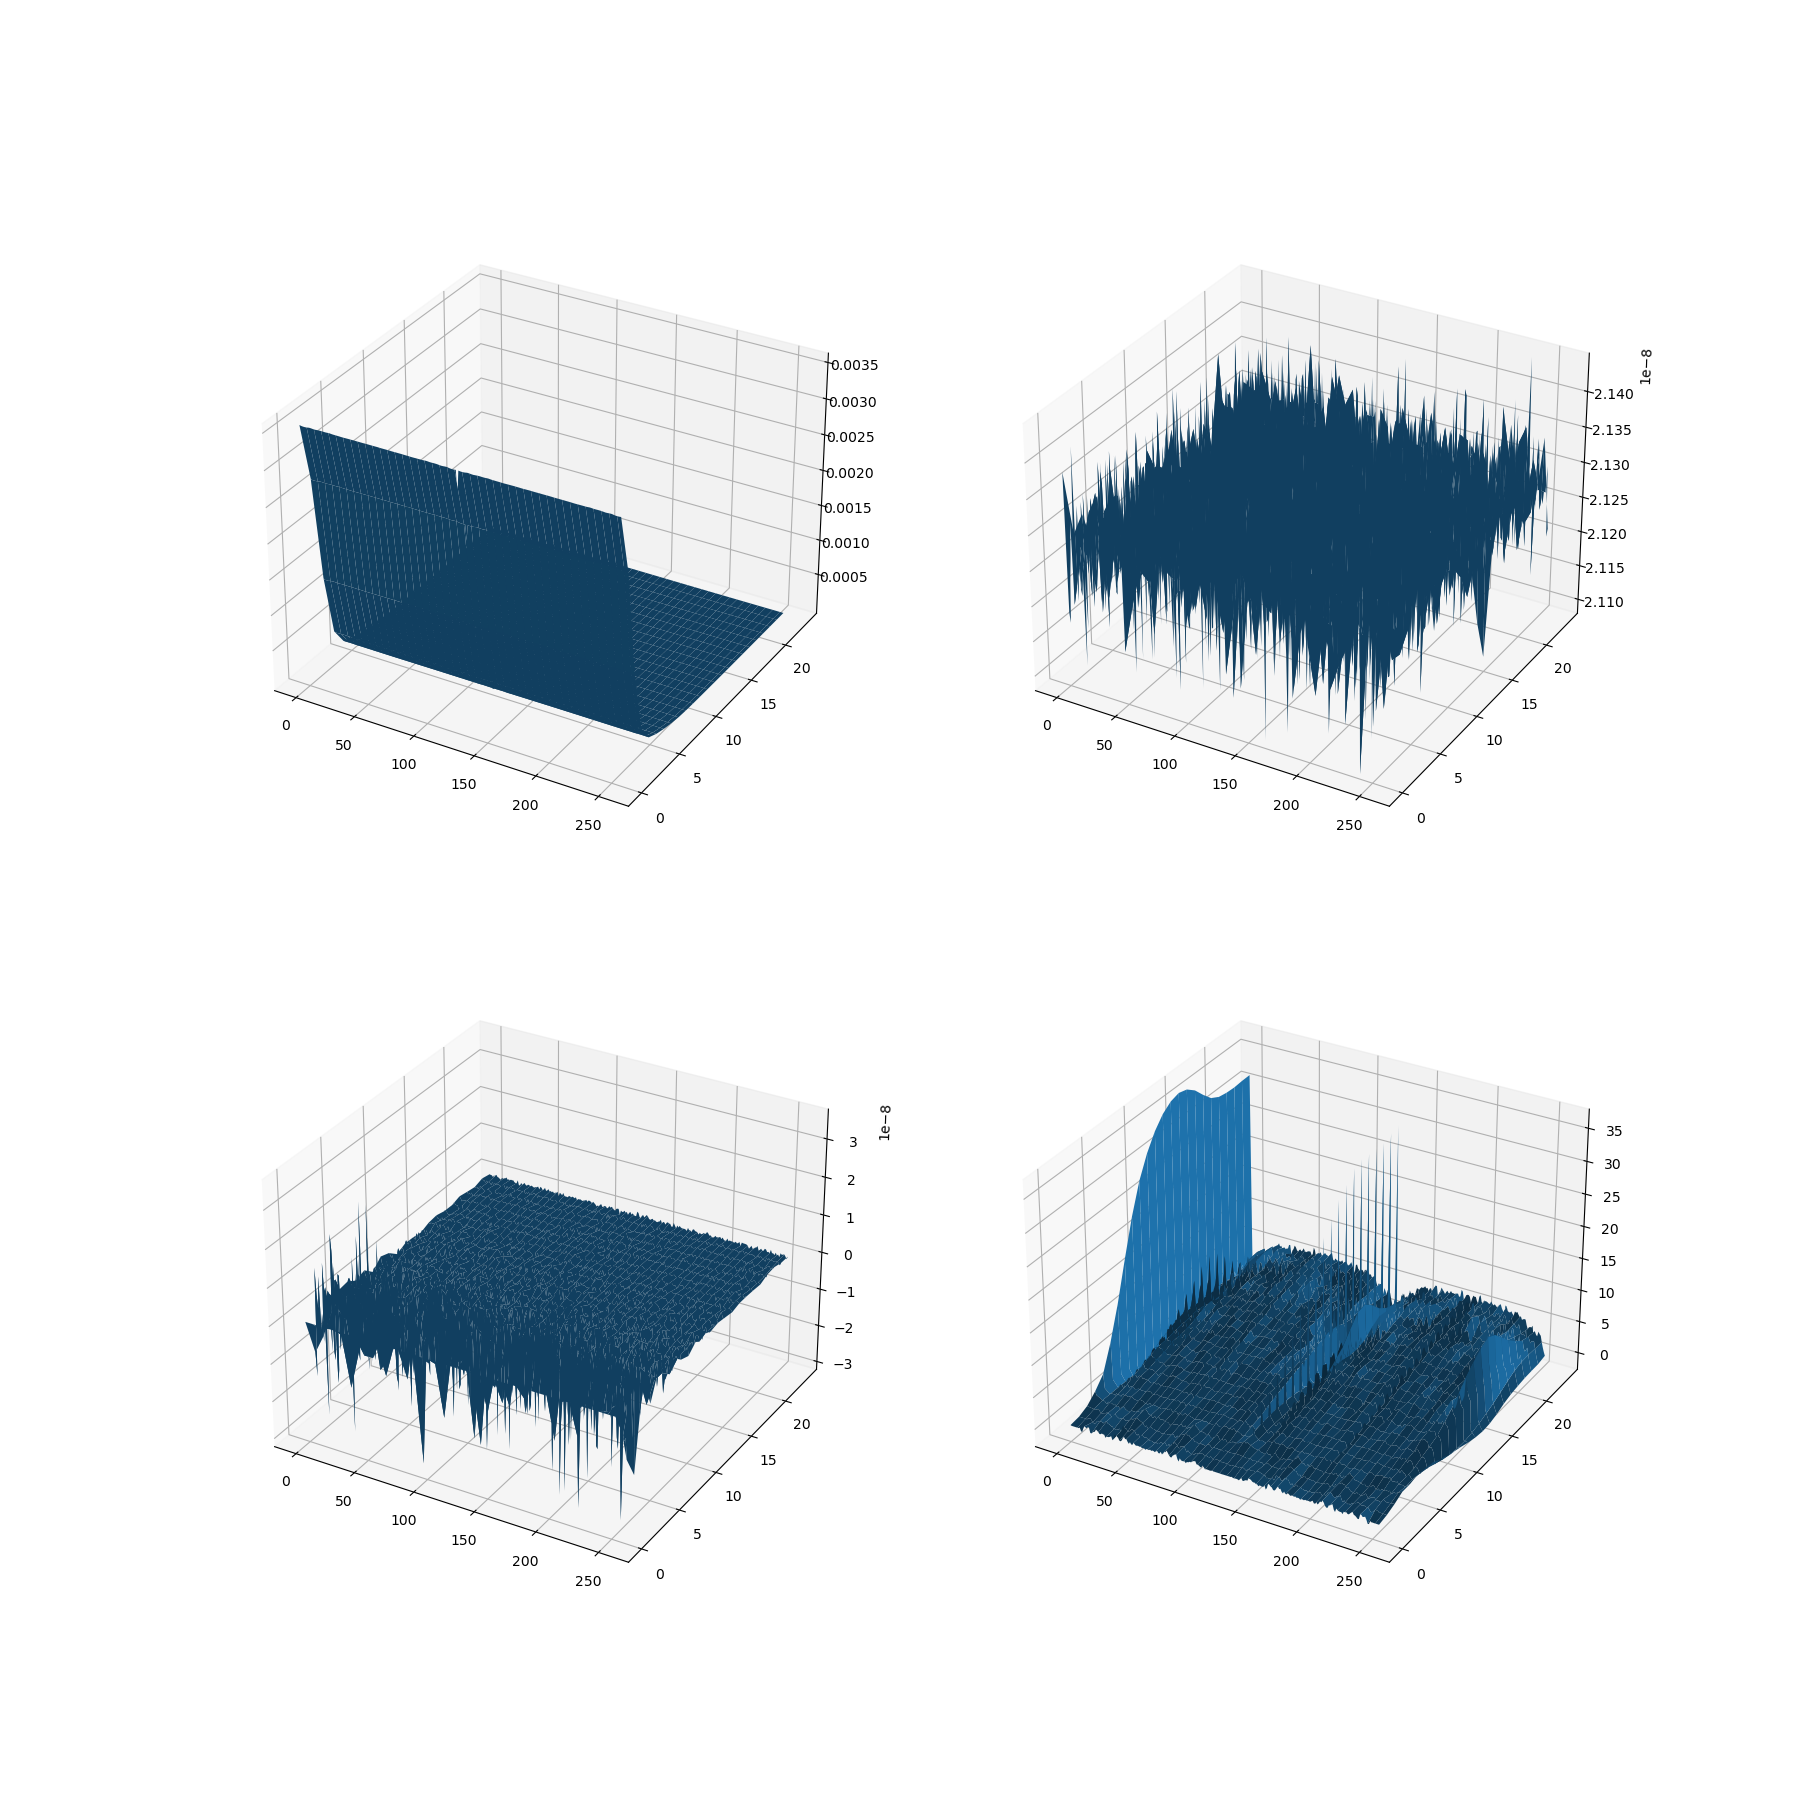

In [6]:
plt.subplots(2, 2, figsize=(18, 18))

axes = typing.cast(mpl_toolkits.mplot3d.Axes3D, plt.subplot(2, 2, 1, projection="3d"))
axes.plot_surface(*torch.meshgrid(torch.arange(runs.s32_n001_pi.shape[0]), torch.arange(runs.s32_n001_pi.shape[1]), indexing="ij"), runs.s32_n001_pi)

axes = typing.cast(mpl_toolkits.mplot3d.Axes3D, plt.subplot(2, 2, 2, projection="3d"))
axes.plot_surface(*torch.meshgrid(torch.arange(runs.s32_n001_delta.shape[0]), torch.arange(runs.s32_n001_delta.shape[1]), indexing="ij"), runs.s32_n001_delta)

axes = typing.cast(mpl_toolkits.mplot3d.Axes3D, plt.subplot(2, 2, 3, projection="3d"))
axes.plot_surface(*torch.meshgrid(torch.arange(runs.s32_n001_gamma.shape[0]), torch.arange(runs.s32_n001_gamma.shape[1]), indexing="ij"), runs.s32_n001_gamma)

axes = typing.cast(mpl_toolkits.mplot3d.Axes3D, plt.subplot(2, 2, 4, projection="3d"))
axes.plot_surface(*torch.meshgrid(torch.arange(runs.s32_n001_coefficients.shape[0]), torch.arange(runs.s32_n001_coefficients.shape[1]), indexing="ij"), runs.s32_n001_coefficients)

plt.show()

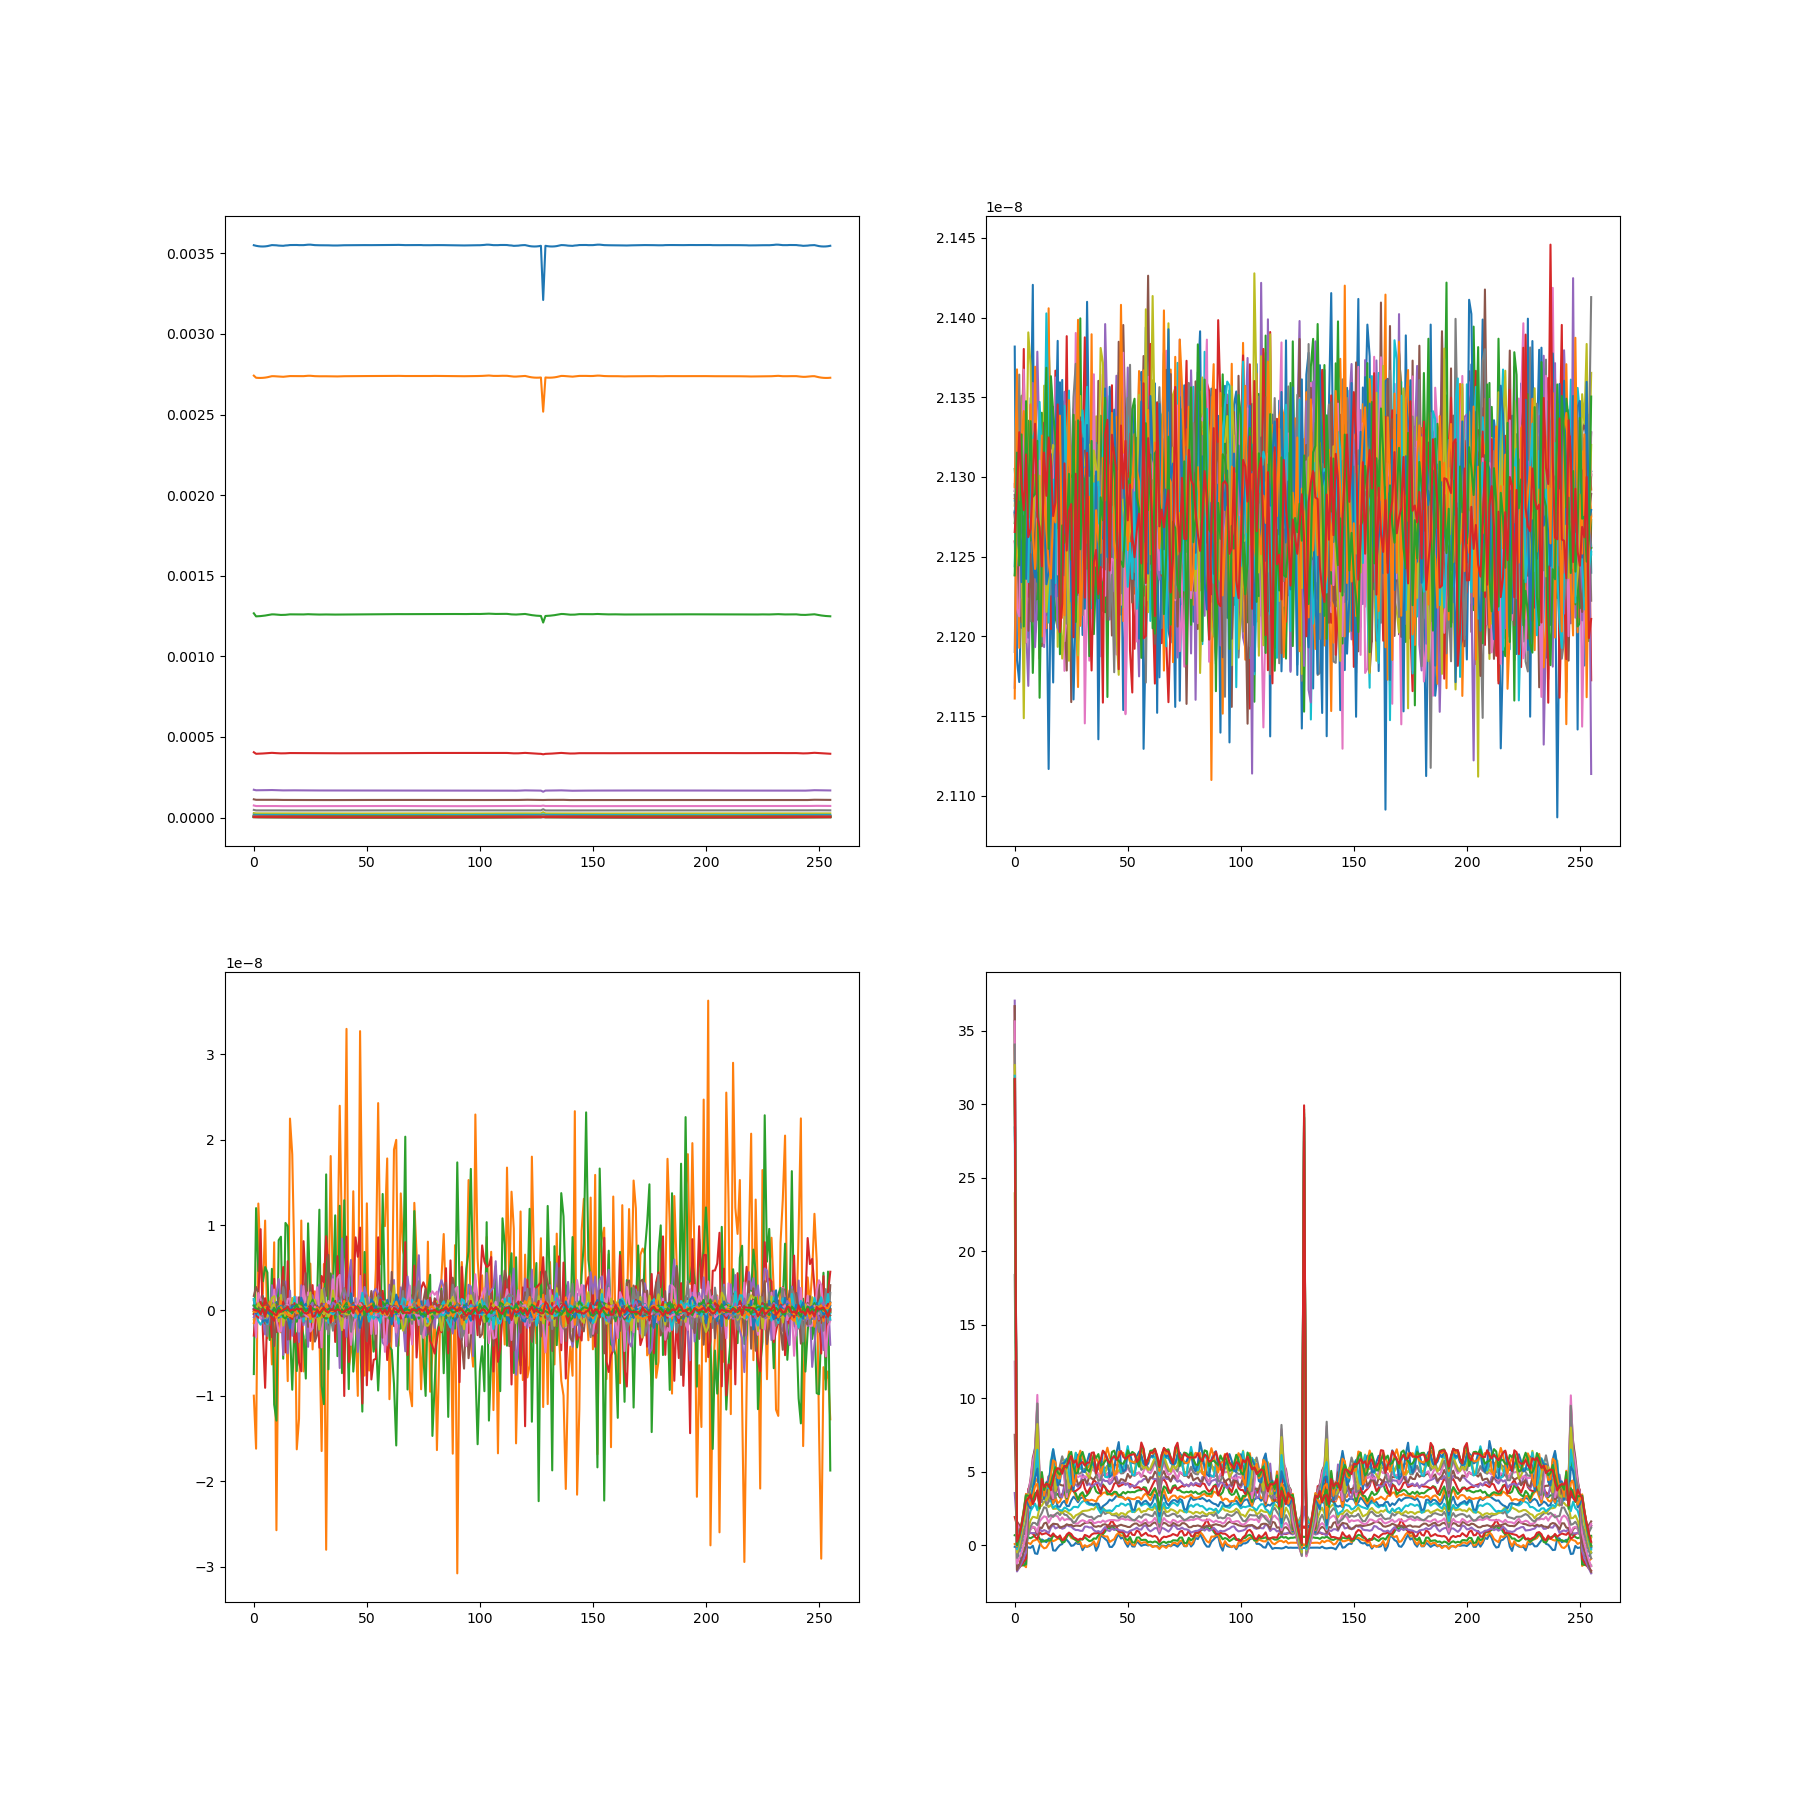

In [7]:
plt.subplots(2, 2, figsize=(18, 18))

axes = plt.subplot(2, 2, 1)
axes.plot(runs.s32_n001_pi)

axes = plt.subplot(2, 2, 2)
axes.plot(runs.s32_n001_delta)

axes = plt.subplot(2, 2, 3)
axes.plot(runs.s32_n001_gamma)

axes = plt.subplot(2, 2, 4)
axes.plot(runs.s32_n001_coefficients)

plt.show()